In [2]:
from os import path, listdir
import re
from types import SimpleNamespace as simplenamespace

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
!ls logs

atlas_train_all_neighbors	openTSNEapprox_1000000.log
FItSNE_1000000.log		openTSNEapprox_100000.log
FItSNE_100000.log		openTSNEapprox_10000.log
FItSNE_10000.log		openTSNEapprox_1000.log
FItSNE_1000.log			openTSNEapprox_250000.log
FItSNE_250000.log		openTSNEapprox_500000.log
FItSNE_500000.log		openTSNEapprox_5000.log
FItSNE_5000.log			openTSNEapprox_750000.log
FItSNE_750000.log		openTSNEapprox8core_1000000.log
FItSNE8core_1000000.log		openTSNEapprox8core_100000.log
FItSNE8core_100000.log		openTSNEapprox8core_10000.log
FItSNE8core_10000.log		openTSNEapprox8core_1000.log
FItSNE8core_1000.log		openTSNEapprox8core_250000.log
FItSNE8core_250000.log		openTSNEapprox8core_500000.log
FItSNE8core_500000.log		openTSNEapprox8core_5000.log
FItSNE8core_5000.log		openTSNEapprox8core_750000.log
FItSNE8core_750000.log		sklearn_1000000.log
MulticoreTSNE_1000000.log	sklearn_100000.log
MulticoreTSNE_100000.log	sklearn_10000.log
MulticoreTSNE_10000.log		sklearn_1000.log
MulticoreTSNE_1000.log		sklearn_250000

In [3]:
LOG_DIR = path.join(path.abspath("."), "logs")

In [6]:
n_points = [1000, 5000, 10_000, 100_000, 250_000, 500_000, 750_000, 1_000_000]

In [7]:
def make_regex_func(pattern, fname):
    
    def _wrapper(n_points):
        matches = [re.findall(pattern, line) for line in
               open(path.join(LOG_DIR, f"{fname}_{n_points}.log"))]
        matches = list(filter(len, matches))
        matches = list(map(lambda x: float(x[0]), matches))

        return np.array(matches)
    
    return _wrapper

In [20]:
parse_opentsne = make_regex_func(r"openTSNE: Full (\d+\.\d+)", "openTSNEapprox")
parse_opentsne_nn = make_regex_func(r"openTSNE: NN search (\d+\.\d+)", "openTSNEapprox")
parse_opentsne_optimization = make_regex_func(r"openTSNE: Optimization (\d+\.\d+)", "openTSNEapprox")

opentsne = simplenamespace(full=parse_opentsne, nn=parse_opentsne_nn, optim=parse_opentsne_optimization)
    
print(opentsne.full(100000))

[228.33709931 225.79553986 226.98500681]


In [21]:
parse_opentsne8 = make_regex_func(r"openTSNE: Full (\d+\.\d+)", "openTSNEapprox8core")
parse_opentsne_nn8 = make_regex_func(r"openTSNE: NN search (\d+\.\d+)", "openTSNEapprox8core")
parse_opentsne_optimization8 = make_regex_func(r"openTSNE: Optimization (\d+\.\d+)", "openTSNEapprox8core")

opentsne8 = simplenamespace(full=parse_opentsne8, nn=parse_opentsne_nn8, optim=parse_opentsne_optimization8)
    
print(opentsne8.full(100000))

[104.89250898 104.21664405 104.45669413]


In [14]:
parse_fitsne = make_regex_func(r"FIt-SNE: (\d+\.\d+)", "FItSNE")
parse_fitsne_nn = make_regex_func(r"100\% (\d+\.\d+)", "FItSNE")

def parse_fitsne_optimization(n_points):
    full_times = parse_fitsne(n_points)
    nn_times = parse_fitsne_nn(n_points)
    return full_times - nn_times

fitsne = simplenamespace(full=parse_fitsne, nn=parse_fitsne_nn, optim=parse_fitsne_optimization)

print(fitsne.full(100000))

[177.11653399 176.98441291 177.97437263]


In [15]:
parse_fitsne8 = make_regex_func(r"FIt-SNE: (\d+\.\d+)", "FItSNE8core")
parse_fitsne_nn8 = make_regex_func(r"100\% (\d+\.\d+)", "FItSNE8core")

def parse_fitsne_optimization8(n_points):
    full_times = parse_fitsne8(n_points)
    nn_times = parse_fitsne_nn8(n_points)
    return full_times - nn_times

fitsne8 = simplenamespace(full=parse_fitsne8, nn=parse_fitsne_nn8, optim=parse_fitsne_optimization8)

print(fitsne8.full(1000))

[13.23060322 13.45884466 12.84704351]


In [16]:
parse_multicore = make_regex_func(r"Multicore t-SNE: (\d+\.\d+)", "MulticoreTSNE")
parse_multicore_nn = make_regex_func(r"Done in (\d+\.\d+) seconds", "MulticoreTSNE")
parse_multicore_optimization = make_regex_func(r"Fitting performed in (\d+\.\d+) seconds", "MulticoreTSNE")

multicore = simplenamespace(full=parse_multicore, nn=parse_multicore_nn, optim=parse_multicore_optimization)

print(multicore.full(100000))

[953.92509246 936.90797281 933.63834786]


In [17]:
parse_multicore8 = make_regex_func(r"Multicore t-SNE: (\d+\.\d+)", "MulticoreTSNE8core")
parse_multicore_nn8 = make_regex_func(r"Done in (\d+\.\d+) seconds", "MulticoreTSNE8core")
parse_multicore_optimization8 = make_regex_func(r"Fitting performed in (\d+\.\d+) seconds", "MulticoreTSNE8core")

multicore8 = simplenamespace(full=parse_multicore8, nn=parse_multicore_nn8, optim=parse_multicore_optimization8)

print(multicore8.full(1000))

[2.9090538  2.66580534 2.82796788]


In [40]:
parse_sklearn = make_regex_func(r"scikit-learn t-SNE: (\d+\.\d+)", "sklearn")
parse_sklearn_nn = make_regex_func(r"neighbors for .* samples in (\d+\.\d+)s", "sklearn")

def parse_sklearn_optimization(n_points):
    full_times = parse_sklearn(n_points)
    nn_times = parse_sklearn_nn(n_points)
    return full_times - nn_times

sklearn = simplenamespace(full=parse_sklearn, nn=parse_sklearn_nn, optim=parse_sklearn_optimization)

print(sklearn.full(10000))

[65.73254728 66.63277197 67.05821729]


In [41]:
parse_umap = make_regex_func(r"UMAP: (\d+\.\d+)", "UMAP")

umap = simplenamespace(full=parse_umap, nn=lambda *a, **kw: ..., optim=lambda *a, **kw: ...)

print(umap.full(10000))

[25.80454087 21.35700297 21.26818299]


In [42]:
import warnings

df = pd.DataFrame(columns=["time", "nn_time", "optim_time", "n_samples", "method"])


for method_name, method in [("openTSNE (1 core)", opentsne),
                            ("openTSNE (8 cores)", opentsne8),
                            ("MulticoreTSNE (1 core)", multicore),
                            ("MulticoreTSNE (8 cores)", multicore8),
                            ("FIt-SNE (1 core)", fitsne),
                            ("FIt-SNE (8 cores)", fitsne8),
                            ("scikit-learn (1 core)", sklearn),
                            ("UMAP (1 core)", umap)]:
    for n in n_points:
        try:
            tmp_df = pd.DataFrame({
                "time": method.full(n),
                #"nn_time": method.nn(n),
                #"optim_time": method.optim(n),
            })
            tmp_df["n_samples"] = n
            tmp_df["method"] = method_name
            
            df = df.append(tmp_df, ignore_index=True)
            
        except FileNotFoundError as e:
            warnings.warn(str(e))

/home/ppolicar/.local/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [43]:
df.head()

,method,n_samples,nn_time,optim_time,time
0,openTSNE (1 core),1000,NaN,NaN,15.150531
1,openTSNE (1 core),1000,NaN,NaN,28.151521
2,openTSNE (1 core),1000,NaN,NaN,21.724179
3,openTSNE (1 core),5000,NaN,NaN,30.766439
4,openTSNE (1 core),5000,NaN,NaN,25.733601


In [44]:
df.groupby(["method", "n_samples"]).count()

nn_time  optim_time  time
method                  n_samples                           
FIt-SNE (1 core)        1000             0           0     3
                        5000             0           0     3
                        10000            0           0     3
                        100000           0           0     3
                        250000           0           0     3
                        500000           0           0     3
                        750000           0           0     3
                        1000000          0           0     3
FIt-SNE (8 cores)       1000             0           0     3
                        5000             0           0     3
                        10000            0           0     3
                        100000           0           0     3
                        250000           0           0     3
                        500000           0           0     3
                        750000           0           0     3
                        1000000          0           0     3
MulticoreTSNE (1 core)  1000             0           0     3
                        5000             0           0     3
                        10000            0           0     3
                        100000           0           0     3
                        250000           0           0     3
                        500000           0           0     3
                        750000           0           0     3
                        1000000          0           0     3
MulticoreTSNE (8 cores) 1000             0           0     3
                        5000             0           0     3
                        10000            0           0     3
                        100000           0           0     3
                        250000           0           0     3
                        500000           0           0     3
...                                    ...         ...   ...
UMAP (1 core)           10000            0           0     3
                        100000           0           0     3
                        250000           0           0     3
                        500000           0           0     3
                        750000           0           0     3
                        1000000          0           0     3
openTSNE (1 core)       1000             0           0     3
                        5000             0           0     3
                        10000            0           0     3
                        100000           0           0     3
                        250000           0           0     3
                        500000           0           0     3
                        750000           0           0     3
                        1000000          0           0     3
openTSNE (8 cores)      1000             0           0     3
                        5000             0           0     3
                        10000            0           0     3
                        100000           0           0     3
                        250000           0           0     3
                        500000           0           0     3
                        750000           0           0     3
                        1000000          0           0     3
scikit-learn (1 core)   1000             0           0     3
                        5000             0           0     3
                        10000            0           0     3
                        100000           0           0     3
                        250000           0           0     3
                        500000           0           0     3
                        750000           0           0     3
                        1000000          0           0     3

[64 rows x 3 columns]

In [27]:
import seaborn as sns

#sns.set("notebook", "whitegrid")

In [47]:
df["time_min"] = df["time"] / 60
df.head()

,method,n_samples,nn_time,optim_time,time,time_min
0,openTSNE (1 core),1000,NaN,NaN,15.150531,0.252509
1,openTSNE (1 core),1000,NaN,NaN,28.151521,0.469192
2,openTSNE (1 core),1000,NaN,NaN,21.724179,0.362070
3,openTSNE (1 core),5000,NaN,NaN,30.766439,0.512774
4,openTSNE (1 core),5000,NaN,NaN,25.733601,0.428893


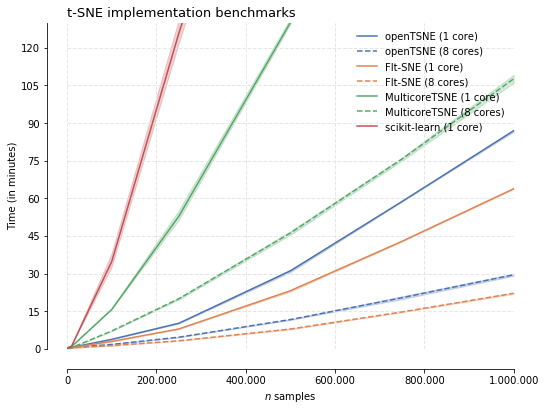

In [35]:
fig, ax = plt.subplots(figsize=(8, 6))
#g = sns.lineplot(x="n_samples", y="time_min", hue="method", data=df, ax=ax)

sns.despine(offset=20)

ax.set_title("t-SNE implementation benchmarks", loc="Left", fontdict={
    "fontsize": "13"
})
ax.set_xlabel("$n$ samples")
ax.set_ylabel("Time (in minutes)")

ax.grid(color="0.9", linestyle="--", linewidth=1)

# Lines
d = df.groupby(["method", "n_samples"]).mean().reset_index()
d_std = df.groupby(["method", "n_samples"]).std().reset_index()

# openTSNE
which = "openTSNE (1 core)"
tmp = d[d["method"] == which]
tmp1 = d_std[d_std["method"] == which]
ax.plot(tmp["n_samples"], tmp["time_min"], c="#4C72B0", label=which)
ax.fill_between(tmp1["n_samples"],
                tmp["time_min"] + tmp1["time_min"],
                tmp["time_min"] - tmp1["time_min"], alpha=0.25, color="#4C72B0")

which = "openTSNE (8 cores)"
tmp = d[d["method"] == which]
tmp1 = d_std[d_std["method"] == which]
ax.plot(tmp["n_samples"], tmp["time_min"], c="#4C72B0", linestyle="dashed", label=which)
ax.fill_between(tmp1["n_samples"],
                tmp["time_min"] + tmp1["time_min"],
                tmp["time_min"] - tmp1["time_min"], alpha=0.25, color="#4C72B0")

# FIt-SNE
which = "FIt-SNE (1 core)"
tmp = d[d["method"] == which]
tmp1 = d_std[d_std["method"] == which]
ax.plot(tmp["n_samples"], tmp["time_min"], c="#DD8452", label=which)
ax.fill_between(tmp1["n_samples"],
                tmp["time_min"] + tmp1["time_min"],
                tmp["time_min"] - tmp1["time_min"], alpha=0.25, color="#DD8452")

which = "FIt-SNE (8 cores)"
tmp = d[d["method"] == which]
tmp1 = d_std[d_std["method"] == which]
ax.plot(tmp["n_samples"], tmp["time_min"], c="#DD8452", linestyle="dashed", label=which)
ax.fill_between(tmp1["n_samples"],
                tmp["time_min"] + tmp1["time_min"],
                tmp["time_min"] - tmp1["time_min"], alpha=0.25, color="#DD8452")

# MulticoreTSNE
which = "MulticoreTSNE (1 core)"
tmp = d[d["method"] == which]
tmp1 = d_std[d_std["method"] == which]
ax.plot(tmp["n_samples"], tmp["time_min"], c="#55A868", label=which)
ax.fill_between(tmp1["n_samples"],
                tmp["time_min"] + tmp1["time_min"],
                tmp["time_min"] - tmp1["time_min"], alpha=0.25, color="#55A868")

which = "MulticoreTSNE (8 cores)"
tmp = d[d["method"] == which]
tmp1 = d_std[d_std["method"] == which]
ax.plot(tmp["n_samples"], tmp["time_min"], c="#55A868", linestyle="dashed", label=which)
ax.fill_between(tmp1["n_samples"],
                tmp["time_min"] + tmp1["time_min"],
                tmp["time_min"] - tmp1["time_min"], alpha=0.25, color="#55A868")

# sklearn
which = "scikit-learn (1 core)"
tmp = d[d["method"] == which]
tmp1 = d_std[d_std["method"] == which]
ax.plot(tmp["n_samples"], tmp["time_min"], c="#C44E52", label=which)
ax.fill_between(tmp1["n_samples"],
                tmp["time_min"] + tmp1["time_min"],
                tmp["time_min"] - tmp1["time_min"], alpha=0.25, color="#C44E52")

ax.set_xlim(0, 1_000_000)
ax.set_ylim(0, 130)
ax.set_yticks(range(0, 130, 15))

ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(
    lambda x, p: format(int(x), ',').replace(",", ".")))

handles, labels = ax.get_legend_handles_labels()
ax.legend(frameon=False, loc='upper right')

plt.savefig("benchmarks.png", dpi=300, transparent=True)

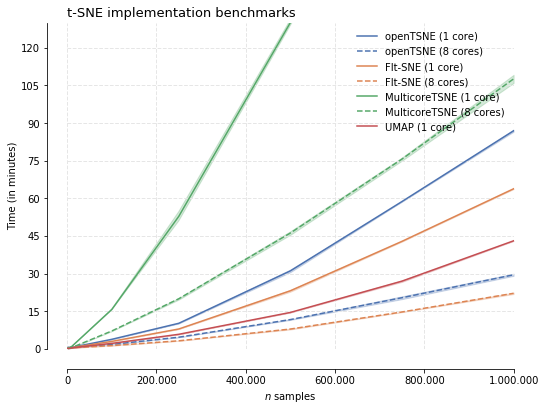

In [49]:
fig, ax = plt.subplots(figsize=(8, 6))
#g = sns.lineplot(x="n_samples", y="time_min", hue="method", data=df, ax=ax)

sns.despine(offset=20)

ax.set_title("t-SNE implementation benchmarks", loc="Left", fontdict={
    "fontsize": "13"
})
ax.set_xlabel("$n$ samples")
ax.set_ylabel("Time (in minutes)")

ax.grid(color="0.9", linestyle="--", linewidth=1)

# Lines
d = df.groupby(["method", "n_samples"]).mean().reset_index()
d_std = df.groupby(["method", "n_samples"]).std().reset_index()

# openTSNE
which = "openTSNE (1 core)"
tmp = d[d["method"] == which]
tmp1 = d_std[d_std["method"] == which]
ax.plot(tmp["n_samples"], tmp["time_min"], c="#4C72B0", label=which)
ax.fill_between(tmp1["n_samples"],
                tmp["time_min"] + tmp1["time_min"],
                tmp["time_min"] - tmp1["time_min"], alpha=0.25, color="#4C72B0")

which = "openTSNE (8 cores)"
tmp = d[d["method"] == which]
tmp1 = d_std[d_std["method"] == which]
ax.plot(tmp["n_samples"], tmp["time_min"], c="#4C72B0", linestyle="dashed", label=which)
ax.fill_between(tmp1["n_samples"],
                tmp["time_min"] + tmp1["time_min"],
                tmp["time_min"] - tmp1["time_min"], alpha=0.25, color="#4C72B0")

# FIt-SNE
which = "FIt-SNE (1 core)"
tmp = d[d["method"] == which]
tmp1 = d_std[d_std["method"] == which]
ax.plot(tmp["n_samples"], tmp["time_min"], c="#DD8452", label=which)
ax.fill_between(tmp1["n_samples"],
                tmp["time_min"] + tmp1["time_min"],
                tmp["time_min"] - tmp1["time_min"], alpha=0.25, color="#DD8452")

which = "FIt-SNE (8 cores)"
tmp = d[d["method"] == which]
tmp1 = d_std[d_std["method"] == which]
ax.plot(tmp["n_samples"], tmp["time_min"], c="#DD8452", linestyle="dashed", label=which)
ax.fill_between(tmp1["n_samples"],
                tmp["time_min"] + tmp1["time_min"],
                tmp["time_min"] - tmp1["time_min"], alpha=0.25, color="#DD8452")

# MulticoreTSNE
which = "MulticoreTSNE (1 core)"
tmp = d[d["method"] == which]
tmp1 = d_std[d_std["method"] == which]
ax.plot(tmp["n_samples"], tmp["time_min"], c="#55A868", label=which)
ax.fill_between(tmp1["n_samples"],
                tmp["time_min"] + tmp1["time_min"],
                tmp["time_min"] - tmp1["time_min"], alpha=0.25, color="#55A868")

which = "MulticoreTSNE (8 cores)"
tmp = d[d["method"] == which]
tmp1 = d_std[d_std["method"] == which]
ax.plot(tmp["n_samples"], tmp["time_min"], c="#55A868", linestyle="dashed", label=which)
ax.fill_between(tmp1["n_samples"],
                tmp["time_min"] + tmp1["time_min"],
                tmp["time_min"] - tmp1["time_min"], alpha=0.25, color="#55A868")

# sklearn
#which = "scikit-learn (1 core)"
#tmp = d[d["method"] == which]
#tmp1 = d_std[d_std["method"] == which]
#ax.plot(tmp["n_samples"], tmp["time_min"], c="#C44E52", label=which)
#ax.fill_between(tmp1["n_samples"],
#                tmp["time_min"] + tmp1["time_min"],
#                tmp["time_min"] - tmp1["time_min"], alpha=0.25, color="#C44E52")

# UMAP
which = "UMAP (1 core)"
tmp = d[d["method"] == which]
tmp1 = d_std[d_std["method"] == which]
ax.plot(tmp["n_samples"], tmp["time_min"], c="#C44E52", label=which)
ax.fill_between(tmp1["n_samples"],
                tmp["time_min"] + tmp1["time_min"],
                tmp["time_min"] - tmp1["time_min"], alpha=0.25, color="#C44E52")

ax.set_xlim(0, 1_000_000)
ax.set_ylim(0, 130)
ax.set_yticks(range(0, 130, 15))

ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(
    lambda x, p: format(int(x), ',').replace(",", ".")))

handles, labels = ax.get_legend_handles_labels()
ax.legend(frameon=False, loc='upper right')

#plt.savefig("benchmarks.png", dpi=300, transparent=True)